## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'app.py', 'Dockerfile', 'heart.csv', 'Heart_disease_prediction.ipynb', 'pseducode', 'random_forest_model.pkl', 'README.md', 'requirements.txt']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2,1
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
###Luckily, we have no missing values

#### Let's understand our columns better:

In [10]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [14]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

target
1    165
0    138
Name: count, dtype: int64


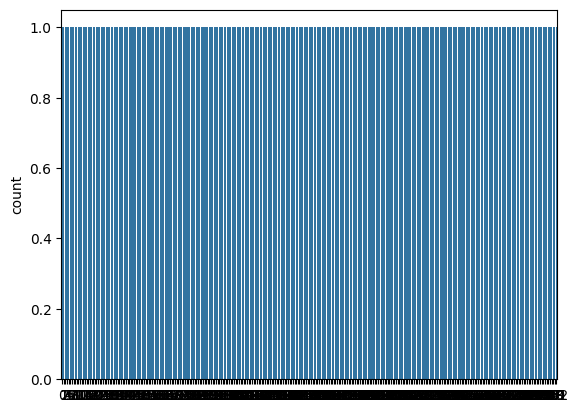

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0])

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

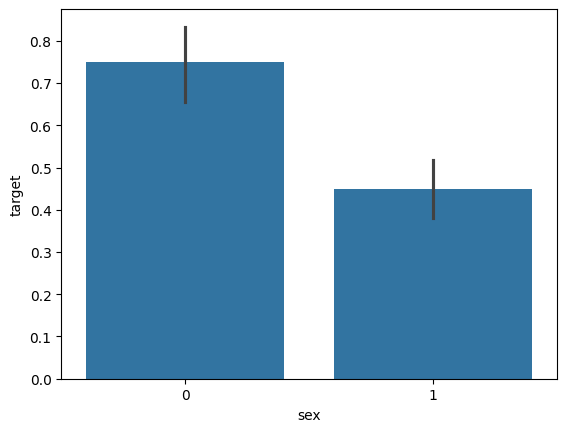

In [18]:
sns.barplot(x="sex", y=y, data=dataset)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0])

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

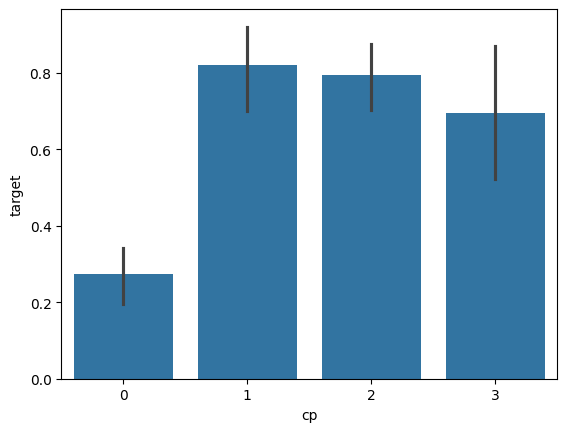

In [20]:
sns.barplot(x=dataset["cp"],y=y, data=dataset)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

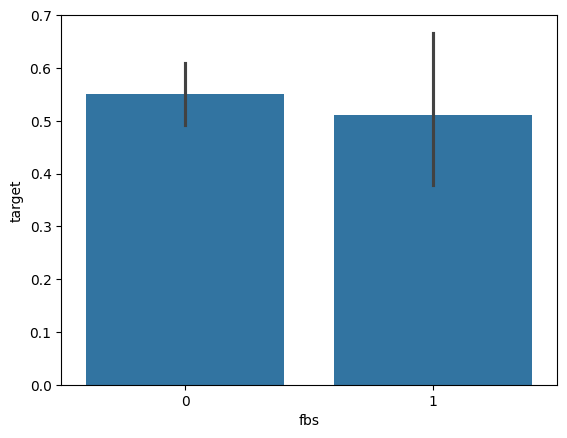

In [23]:
sns.barplot(x=dataset["fbs"],y=y,data=dataset)

##### Nothing extraordinary here

### Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

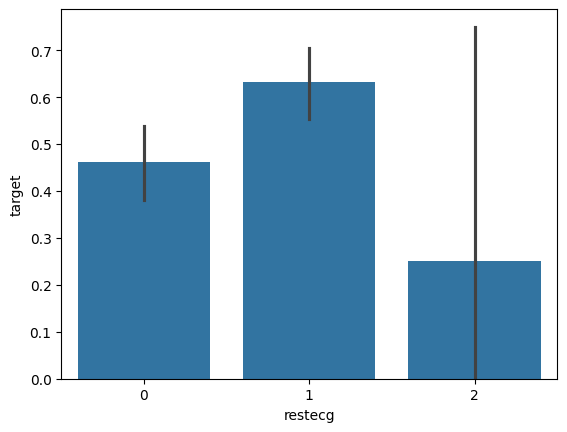

In [25]:
sns.barplot(x=dataset["restecg"],y=y,data=dataset)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

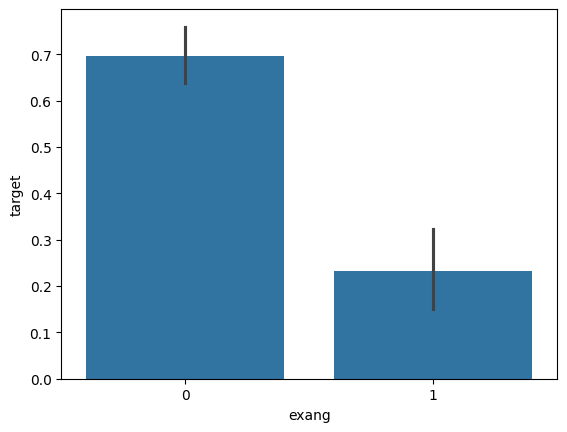

In [27]:
sns.barplot(x=dataset["exang"],y=y,data=dataset)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

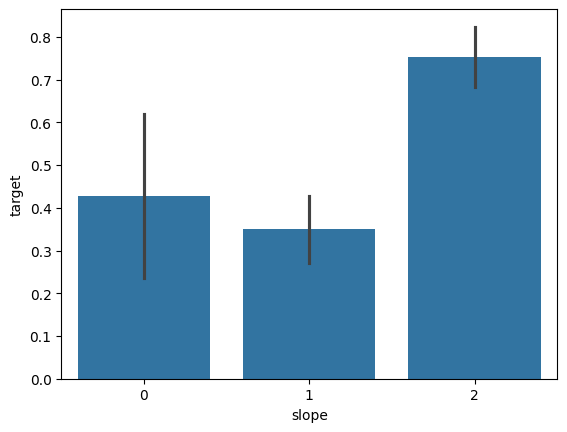

In [29]:
sns.barplot(x=dataset["slope"],y=y,data=dataset)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [30]:
#number of major vessels (0-3) colored by flourosopy

In [31]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: ylabel='count'>

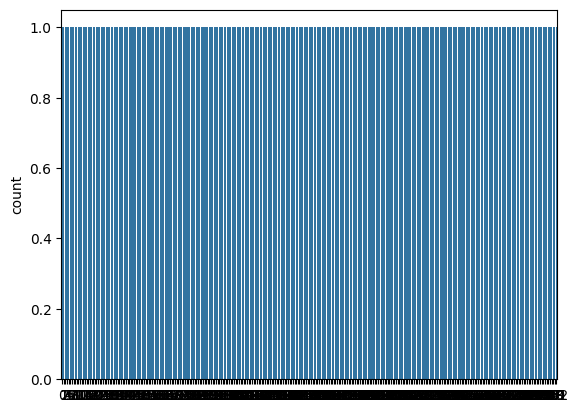

In [32]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

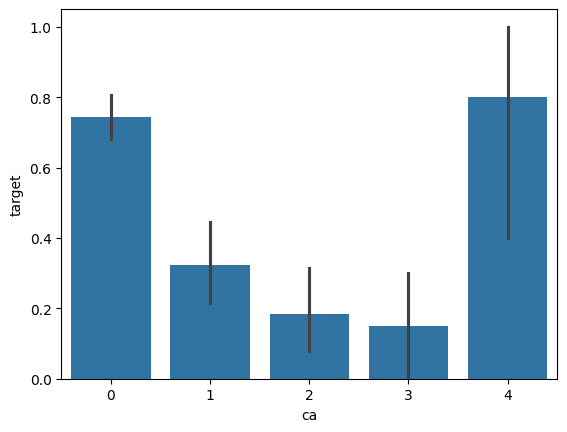

In [33]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [34]:
### Analysing the 'thal' feature

In [35]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

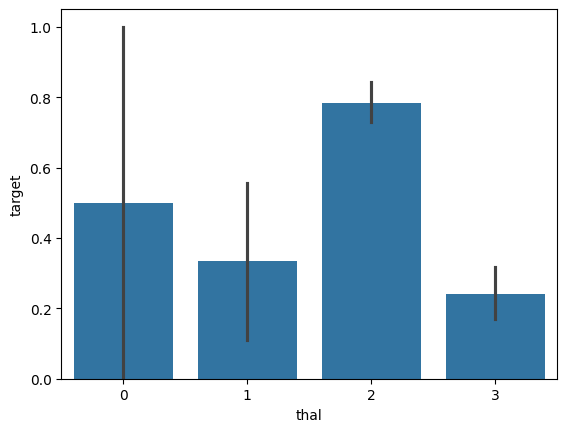

In [36]:
sns.barplot(x=dataset["thal"],y=y,data=dataset)

<Axes: xlabel='thal', ylabel='Density'>

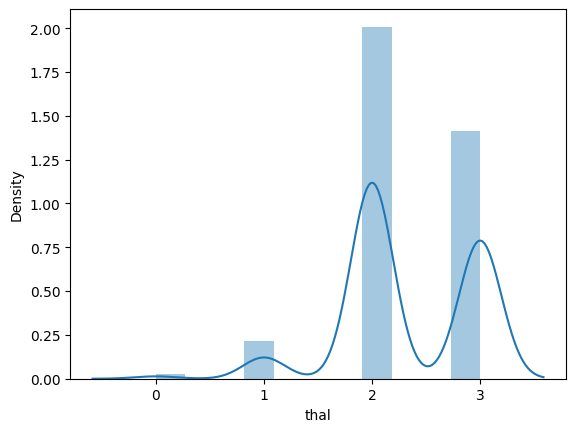

In [37]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2


In [42]:
Y_train.shape

(242,)

In [43]:
Y_test.shape

(61,)

## V. Model Fitting

In [44]:
from sklearn.metrics import accuracy_score

### Logistic Regression

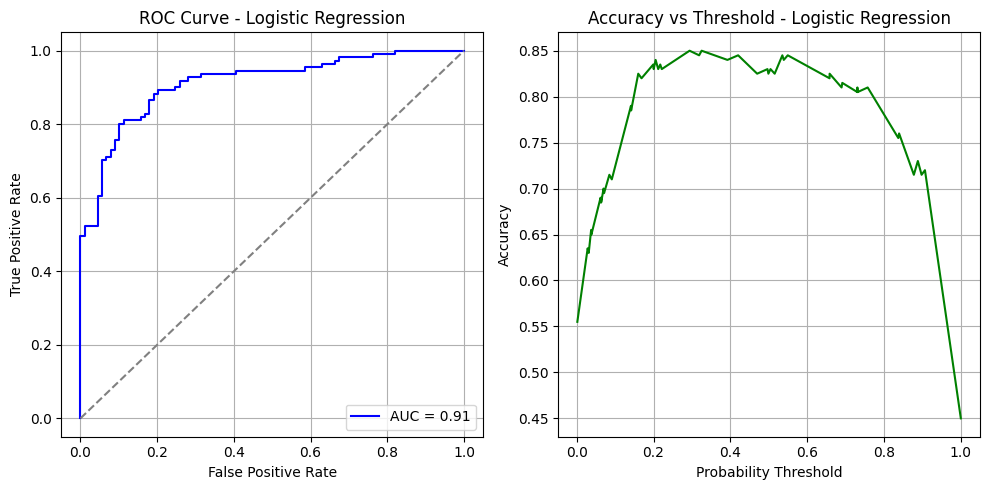

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Generate some sample data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instantiate the Logistic Regression model
lr = LogisticRegression(random_state=42) # You can add other hyperparameters here

# 3. Train the model on the training data
lr.fit(X_train, Y_train)

# Now you can run the code to plot the ROC curve and accuracy
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
Y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_lr, tpr_lr, thresholds_roc = roc_curve(Y_test, Y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute accuracy for different thresholds
accuracy_scores = []
for thresh in thresholds_roc:
    Y_pred_thresh = (Y_proba_lr >= thresh).astype(int)
    accuracy_scores.append(accuracy_score(Y_test, Y_pred_thresh))

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_roc, accuracy_scores, color='green')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - Logistic Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# Assuming you have already imported and trained your Logistic Regression model (lr)
# and have your test data (X_test)

# Make predictions on the test set
Y_pred_lr = lr.predict(X_test)

# Now you can check the shape
print(Y_pred_lr.shape)

(200,)


In [47]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 83.0 %


### Naive Bayes

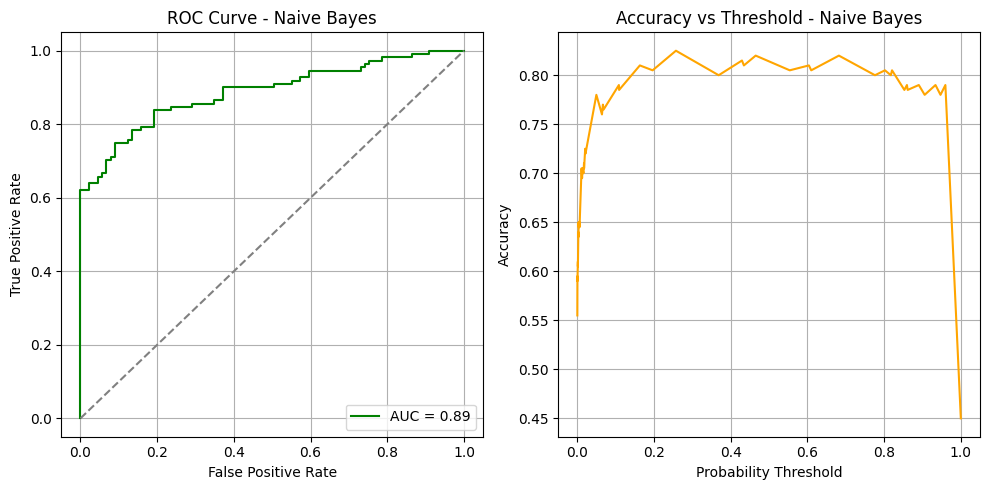

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# 1. Generate some sample data (replace with your actual data loading)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instantiate the Gaussian Naive Bayes model
nb = GaussianNB()

# 3. Train the model on the training data
nb.fit(X_train, Y_train)

# Now you can run the code to plot the ROC curve and accuracy
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities
Y_proba_nb = nb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_nb, tpr_nb, thresholds_nb = roc_curve(Y_test, Y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Compute accuracy for different thresholds
accuracy_scores_nb = []
for thresh in thresholds_nb:
    Y_pred_thresh_nb = (Y_proba_nb >= thresh).astype(int)
    accuracy_scores_nb.append(accuracy_score(Y_test, Y_pred_thresh_nb))

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_nb, tpr_nb, color='green', label=f'AUC = {roc_auc_nb:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_nb, accuracy_scores_nb, color='orange')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - Naive Bayes')
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# Assuming you have already imported and trained your Naive Bayes model (nb)
# and have your test data (X_test)

# Make predictions on the test set
Y_pred_nb = nb.predict(X_test)

# Now you can check the shape
print(Y_pred_nb.shape)

(200,)


In [50]:
score_nb = round(accuracy_score(Y_pred_nb, Y_test) * 100, 2)

### SVM

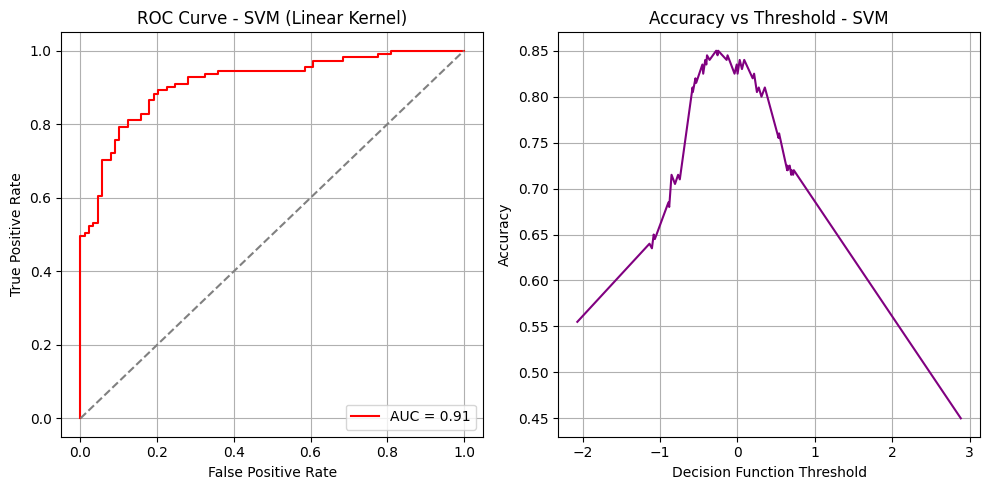

In [51]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Generate some sample data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Instantiate the LinearSVC model
sv = LinearSVC(random_state=42)

# 3. Train the model
sv.fit(X_train, Y_train)

# Now you can run the code to plot the ROC curve and accuracy
Y_scores_svm = sv.decision_function(X_test)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, Y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Convert decision function scores to predictions based on threshold
accuracy_scores_svm = []
for thresh in thresholds_svm:
    Y_pred_thresh_svm = (Y_scores_svm >= thresh).astype(int)
    accuracy_scores_svm.append(accuracy_score(Y_test, Y_pred_thresh_svm))

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_svm, tpr_svm, color='red', label=f'AUC = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Linear Kernel)')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_svm, accuracy_scores_svm, color='purple')
plt.xlabel('Decision Function Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - SVM')
plt.grid(True)

plt.tight_layout()
plt.show()

In [52]:
# Assuming you have already imported and trained your SVM model (sv)
# and have your test data (X_test)

# Make predictions on the test set
Y_pred_svm = sv.predict(X_test)

# Now you can check the shape
print(Y_pred_svm.shape)

(200,)


In [53]:
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 82.5 %


### K Nearest Neighbors

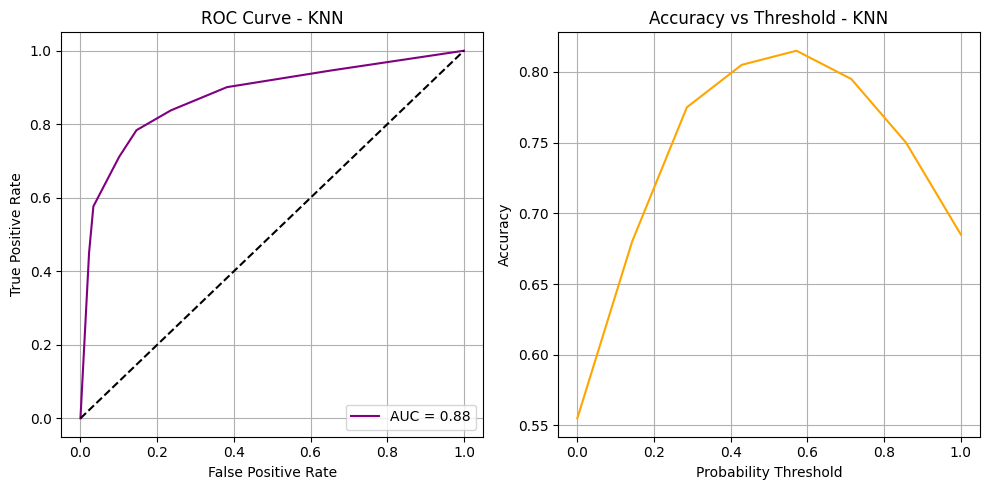

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

# Now you can predict probabilities
Y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, Y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute accuracy for different thresholds
accuracy_scores_knn = []
for thresh in thresholds_knn:
    Y_pred_thresh_knn = (Y_proba_knn >= thresh).astype(int)
    accuracy_scores_knn.append(accuracy_score(Y_test, Y_pred_thresh_knn))

# Plot ROC curve and Accuracy
plt.figure(figsize=(10, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='purple', label=f'AUC = {roc_auc_knn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.grid(True)

# Subplot 2: Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_knn, accuracy_scores_knn, color='orange')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - KNN')
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
# Assuming you have already imported and trained your KNN model (knn)
# and have your test data (X_test)

# Make predictions on the test set
Y_pred_knn = knn.predict(X_test)

# Now you can check the shape
print(Y_pred_knn.shape)

(200,)


In [56]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 81.5 %


### Decision Tree

Best random_state found: 1 with accuracy: 86.0%


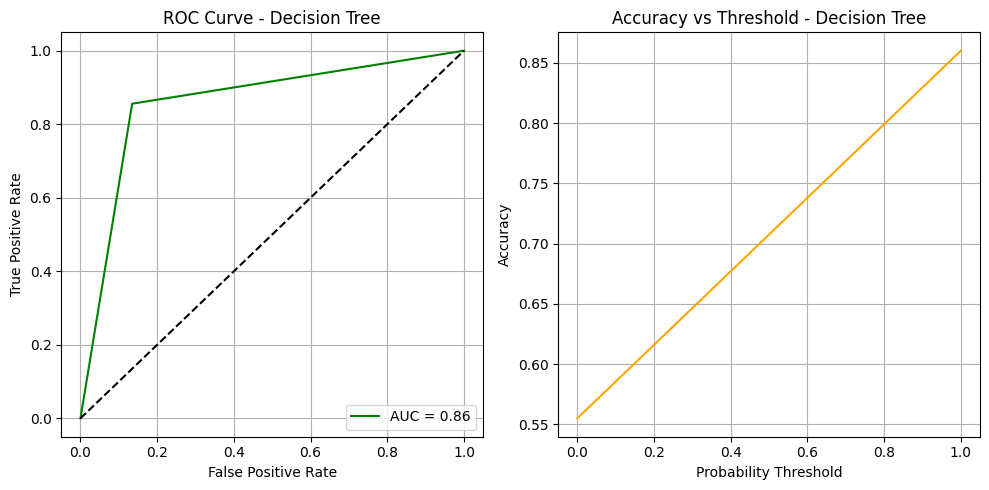

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Find the best random_state based on maximum accuracy
max_accuracy = 0
best_x = None
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

print(f"Best random_state found: {best_x} with accuracy: {max_accuracy}%")

# Use the best random_state found
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train, Y_train)

# Predict probabilities for the positive class
Y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, Y_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Compute accuracy for different thresholds
accuracy_scores_dt = []
for thresh in thresholds_dt:
    Y_pred_thresh_dt = (Y_proba_dt >= thresh).astype(int)
    accuracy_scores_dt.append(accuracy_score(Y_test, Y_pred_thresh_dt))

# Plot ROC curve and Accuracy
plt.figure(figsize=(10, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='green', label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)

# Subplot 2: Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_dt, accuracy_scores_dt, color='orange')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - Decision Tree')
plt.grid(True)

plt.tight_layout()
plt.show()

In [58]:
print(Y_pred_dt.shape)

(200,)


In [59]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 84.5 %


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Find the best random_state based on maximum accuracy
max_accuracy = 0
best_x = None
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

print(f"Best random_state found: {best_x} with accuracy: {max_accuracy}%")

# Use the best random_state found
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)

# Predict probabilities for the positive class
Y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, Y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute accuracy for different thresholds
accuracy_scores_rf = []
for thresh in thresholds_rf:
    Y_pred_thresh_rf = (Y_proba_rf >= thresh).astype(int)
    accuracy_scores_rf.append(accuracy_score(Y_test, Y_pred_thresh_rf))

# Plot ROC curve and Accuracy
plt.figure(figsize=(10, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='darkblue', label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)

# Subplot 2: Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_rf, accuracy_scores_rf, color='darkorange')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf, "random_forest_model.pkl")

In [ ]:
Y_pred_rf.shape

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_pred_xgb = xgb_model.predict(X_test)

# Predict probabilities for the positive class
Y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, Y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Compute accuracy for different thresholds
accuracy_scores_xgb = []
for thresh in thresholds_xgb:
    Y_pred_thresh_xgb = (Y_proba_xgb >= thresh).astype(int)
    accuracy_scores_xgb.append(accuracy_score(Y_test, Y_pred_thresh_xgb))

# Plot ROC curve and Accuracy
plt.figure(figsize=(10, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr_xgb, tpr_xgb, color='darkgreen', label=f'AUC = {roc_auc_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)

# Subplot 2: Accuracy vs Threshold
plt.subplot(1, 2, 2)
plt.plot(thresholds_xgb, accuracy_scores_xgb, color='darkred')
plt.xlabel('Probability Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold - XGBoost')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define the neural network model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the neural network model
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred_nn = model.predict(X_test)

# Get predicted probabilities for the positive class (important for ROC)
Y_proba_nn = model.predict_proba(X_test)[:, 1]


In [ ]:
# Compute ROC curve and AUC
fpr_nn, tpr_nn, _ = roc_curve(Y_test, Y_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, color='purple', label=f'AUC = {roc_auc_nn:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)

# Ensure that the plot is displayed
plt.show()


In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,
          score_nn
         ]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"
              ,"Neural Network"
             ]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)